In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
df.shape

(13564, 17)

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


From the above we can observe statistical information of the data.

Age- There is huge difference between 75% and max data. So, there is chance of outliers present in this feature
balance - Mean is greater than 50% data, data is right skewed. There is huge difference between 75% and max value. So, outliers are present in this feature

duration - Mean is greater than 50% data. So, data is right skewed. There is huge difference between 75% data and max value.So, outliers are present in this feature.

campaign,pdays-previous - There is huge difference between 75% data and max value.So, outliers are present in these features.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [10]:
df.job.unique()

array(['services', 'retired', 'self-employed', 'blue-collar',
       'management', 'technician', 'admin.', 'unemployed', 'housemaid',
       'entrepreneur', 'student', 'unknown'], dtype=object)

In [11]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [12]:
df['education'].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [13]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df['contact'].unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [17]:
df['month'].unique()

array(['may', 'jul', 'jun', 'mar', 'feb', 'sep', 'aug', 'dec', 'jan',
       'apr', 'nov', 'oct'], dtype=object)

In [18]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Let's encode categorical object features with the help of encoding techniques.

In [19]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

cols=['job','marital','education','default','housing','loan','contact','month','poutcome']

for i in cols:
    
    df[i]=LE.fit_transform(df[i])
    
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


Let's check the distribution of the data

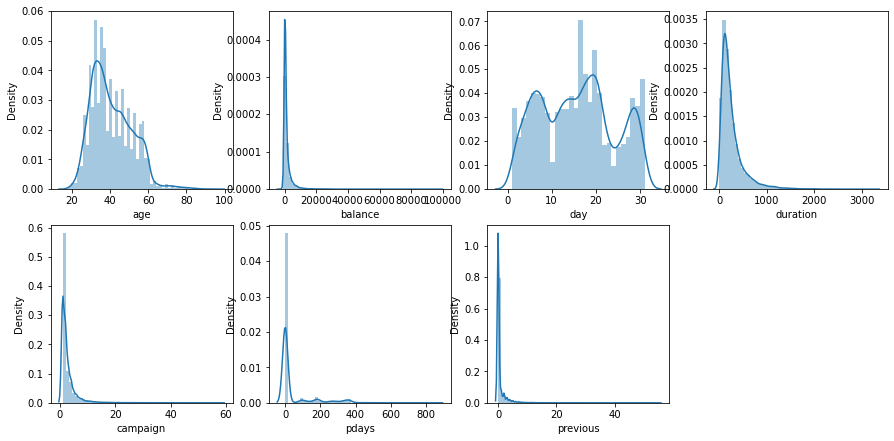

In [20]:
cols=['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15,19))
n=1
for i in cols:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above we can observe skeweness in balance,duration,campaign,pdays,previous features. 
Let's use powertransformation techniques to remove skeweness.

In [21]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

In [22]:
df['balance']=np.cbrt(df['balance'])
df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])
df['age']=np.cbrt(df['age'])

In [23]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age         0.286833
balance    -0.059591
day         0.106806
duration    0.624285
campaign    1.618080
pdays       1.722786
previous    2.005334
dtype: float64

From the above we can observe duration,campaign,pdays,previous features are not in the acceptable range. Let's again perform power transformation techniques.

In [24]:
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])
df['duration']=np.cbrt(df['duration'])

In [25]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age         0.286833
balance    -0.059591
day         0.106806
duration   -0.239222
campaign    1.075360
pdays       1.617398
previous    1.643694
dtype: float64

In [26]:
from scipy.stats import boxcox

a=boxcox(df['campaign'])[0]
df['campaign']=a
df['campaign'].skew()

0.16713969798261627

In [27]:
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])

In [28]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age         0.286833
balance    -0.059591
day         0.106806
duration   -0.239222
campaign    0.167140
pdays       1.608178
previous    1.611015
dtype: float64

From the above we can observe pdays and previous features are still not in acceptable range. 

After applying transformation techniques multiple times there is no change in the skewness value. 
So, I will continue further process.

Let's check for the outliers present in the dataset.

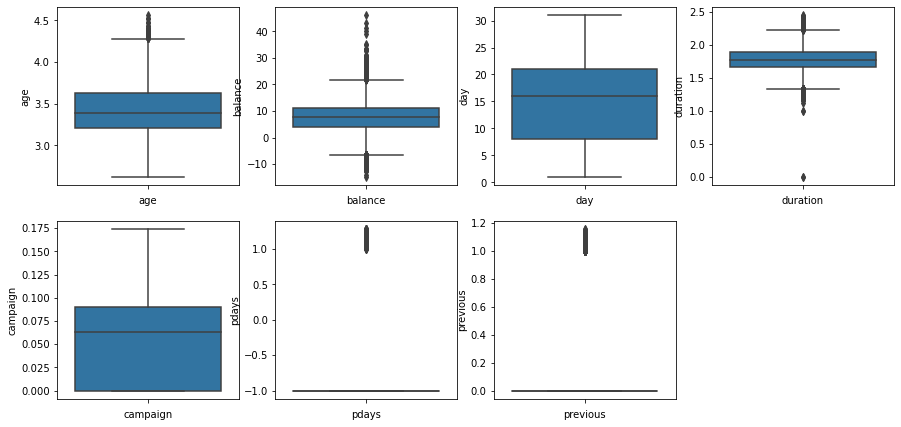

In [29]:
cols=['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15,19))
n=1
for i in cols:
    ax=plt.subplot(5,4,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
    
plt.show()    

From the above, we can observe outliers present in age, balance,duration,pdays,previous features. Let's remove outliers in the dataset.

In [30]:
from scipy.stats import zscore

value=np.abs(zscore(df[['age','balance','duration','pdays','previous']]))
print("shape before removing outliers ",df.shape)
df1=df[(value<3).all(axis=1)]
print("shape after removing outliers ",df1.shape)
df=df1

shape before removing outliers  (13564, 17)
shape after removing outliers  (13406, 17)


With the help of zscore method we have removed outliers from the dataset.

Let's plt heatmap and view how features are correlated with eachother and with target variable

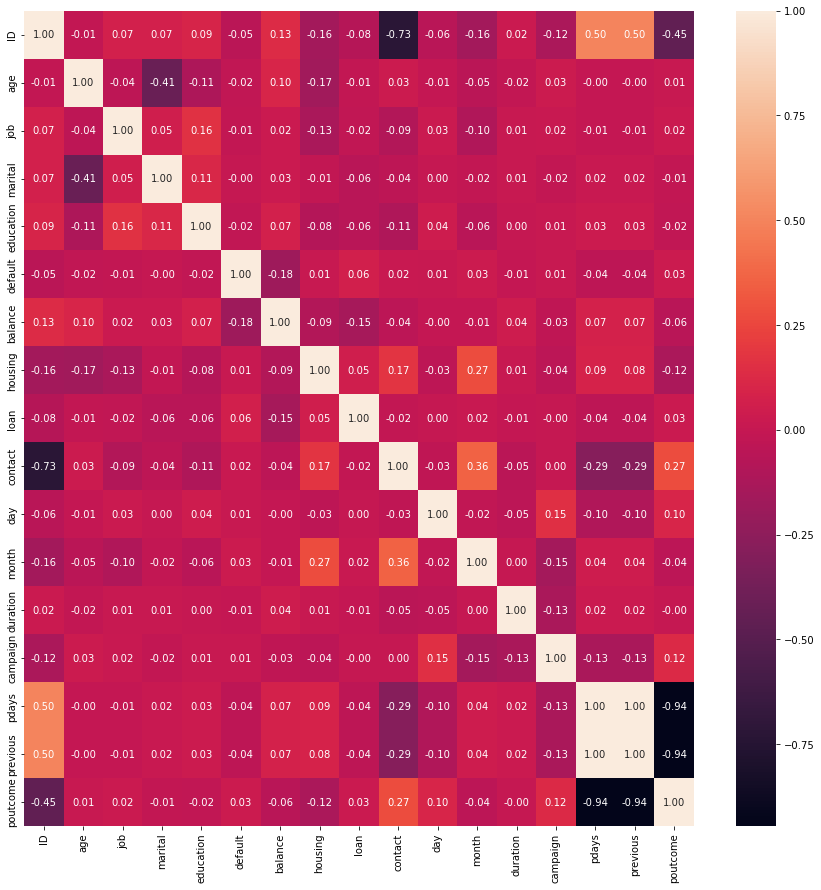

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

As per my observation, ID will not contribute for predicting target variable. Let's drop ID.

In [32]:
df.drop(columns=['ID'],axis=1,inplace=True)

In [33]:
df.shape

(13406, 16)

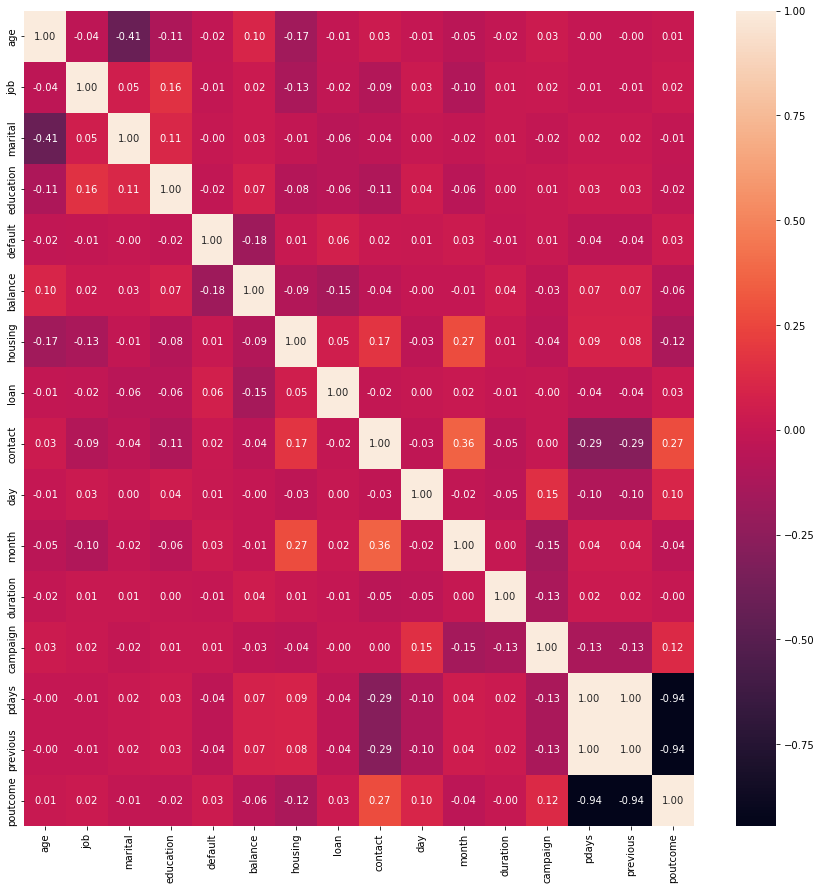

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

Exploratory Data analysis is completed. Let's test the model with this data set and check for the accuracy of the model.

In [35]:
df.drop('pdays',axis=1,inplace=True)

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome'],
      dtype='object')

In [37]:
import pickle
Model=pickle.load(open('Bank_application','rb'))
y_predict=Model.predict(df)

In [38]:
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
subscribed=pd.DataFrame()
subscribed['values']=y_predict
subscribed.value_counts()

values
1         12030
0          1376
dtype: int64